In [41]:
%matplotlib inline
import pylab
from craco import uvfits_meta
import numpy as np

In [2]:
fname = '/CRACO/DATA_01/craco/SB062786/scans/00/20240611133803/b00.uvfits'
fin = uvfits_meta.open(fname)

In [19]:
data, uvw = next(fin.fast_time_blocks(nt=256, fetch_uvws=True))

In [21]:
data.shape

(253, 1, 1, 1, 240, 1, 256)

In [22]:
data = data.squeeze()
data.shape

(253, 240, 256)

In [23]:
fin.nbl

253

In [24]:
fin.baselines

{258.0: (-8.7654996e-08, 7.4194433e-09, -4.751238e-08),
 259.0: (-9.977637e-08, -6.4313646e-08, -3.0553437e-08),
 260.0: (5.0628827e-08, -9.443831e-08, 5.5205454e-08),
 261.0: (2.3689992e-07, -7.68166e-09, 1.257336e-07),
 262.0: (-3.1588783e-07, -4.9478973e-07, -1.12200285e-08),
 263.0: (-7.8600146e-07, 4.6784763e-08, -4.1425534e-07),
 264.0: (-6.244018e-08, 7.6232084e-07, -2.5374243e-07),
 265.0: (7.891162e-07, -4.631701e-08, 4.1882038e-07),
 266.0: (4.780575e-07, -7.264094e-07, 4.6591617e-07),
 267.0: (-5.3584836e-07, -1.3375402e-06, 1.2284656e-07),
 269.0: (-1.5340789e-06, 5.7936063e-07, -9.644777e-07),
 270.0: (-2.6038722e-07, 1.4141314e-06, -5.4396844e-07),
 271.0: (2.027649e-06, 1.347134e-06, 6.6750874e-07),
 272.0: (2.105735e-06, -3.507653e-07, 1.198426e-06),
 273.0: (1.8139971e-06, -9.86532e-07, 1.2351586e-06),
 274.0: (5.771094e-07, -1.0027721e-06, 5.9905426e-07),
 275.0: (-2.8944376e-07, -1.7025428e-06, 3.5825008e-07),
 276.0: (-1.2456874e-06, -1.5409288e-06, -1.8513961e-07),

In [25]:
fin.vis[0]['BASELINE']

258.0

In [26]:
fin.vis[1]['BASELINE']

259.0

In [27]:
fin.raw_nbl

253

In [28]:
fin.vis.dtype

dtype((numpy.record, [('UU', '>f4'), ('VV', '>f4'), ('WW', '>f4'), ('DATE', '>f4'), ('BASELINE', '>f4'), ('FREQSEL', '>f4'), ('SOURCE', '>f4'), ('INTTIM', '>f4'), ('DATA', '>f4', (1, 1, 1, 240, 1, 3))]))

In [29]:
fin.vis[0:3]['DATE']

array([2460473.06910135, 2460473.06910135, 2460473.06910135], dtype='>f8')

In [30]:
fin.max_nbl

In [31]:
fin.start_date

2460473.0691013513

In [32]:
fin.vis.size

7693224

In [34]:
fin.hdulist[0].header['GCOUNT']

7693224

In [36]:
data.shape

(253, 240, 256)

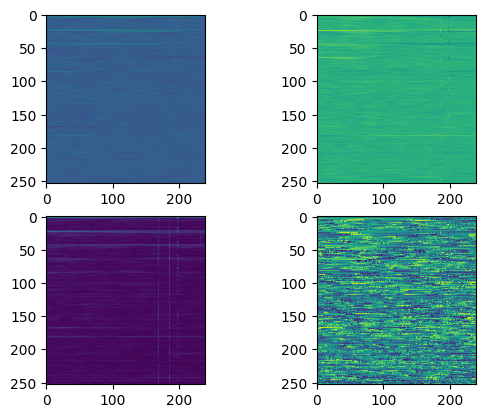

In [42]:
d = data.mean(axis=2)
fig,ax = pylab.subplots(2,2)
ax[0,0].imshow(d.real)
ax[0,1].imshow(d.imag)
ax[1,0].imshow(abs(d))
ax[1,1].imshow(np.angle(d))

In [43]:
d.shape

(253, 240)

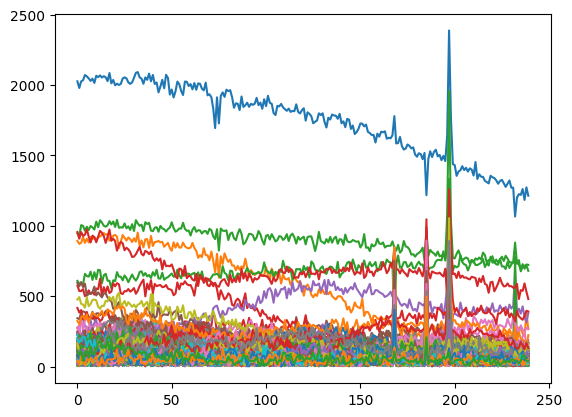

In [58]:
_ = pylab.plot(abs(d).T)

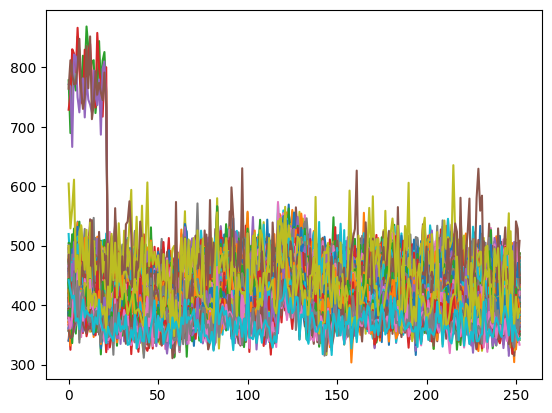

In [59]:
ds = data.imag.std(axis=2)
_ = pylab.plot(ds)


(0.0, 37.0)

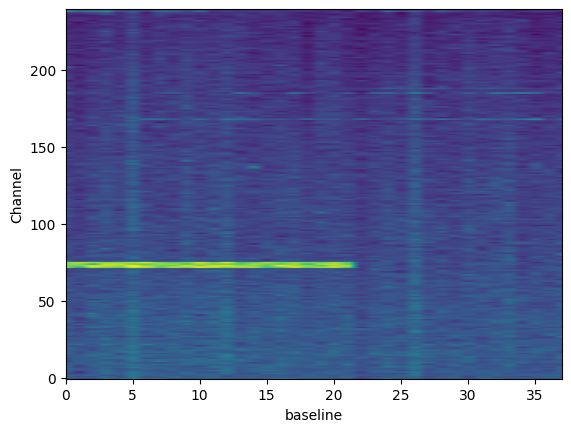

In [60]:
pylab.imshow(ds.T, aspect='auto', origin='lower')
pylab.xlabel('baseline')
pylab.ylabel('Channel')
pylab.xlim(0,37)